In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Credit Card Fraud')

Text(0, 0.5, 'Frequency')

([<matplotlib.axis.XTick at 0x1a1e9d0240>,
 <a list of 2 Text xticklabel objects>)

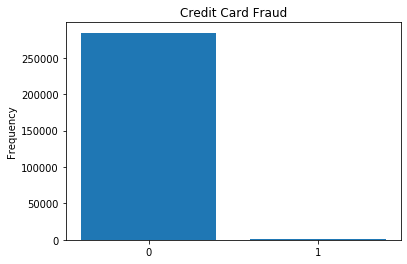

In [31]:
count_class = pd.value_counts(data['Class'],sort = True).sort_index()
count_class
plt.bar(count_class.index,count_class)
plt.title('Credit Card Fraud')
plt.ylabel("Frequency")
plt.xticks([0,1])

## Transform `Amount` to [-1,1],because the range is too large

In [32]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Set X,y data for model
* because data are unbalance, 0 is far more than 1
    * undersampling or oversampling should be used

### Undersampling Srategy

In [33]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [34]:
# Undersampled dataset
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_undersample,
                                                            y_undersample,
                                                            test_size = 0.3,
                                                            random_state= 0)
print("")
print("Number transactions train dataset: ", len(X_train_u))
print("Number transactions test dataset: ", len(X_test_u))
print("Total number of transactions: ", len(X_train_u)+len(X_test_u))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


#### recall = tp/(tp+fn)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
import statistics 

In [36]:
def printing_Kfold_scores(x,y):
    
    x_train_data = pd.DataFrame(x)
    y_train_data = pd.DataFrame(y)
    
    kfold = KFold(5,shuffle=False)
    fold = list(kfold.split(y_train_data))

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]

    recall_accs = {}
    recall_mean = {}
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        
        
        recall_accs[c_param] = []
        recall_mean[c_param] = []
        
        iteration = 1
        for i in fold:
            lr = LogisticRegression(C = c_param, penalty = 'l1')
            lr.fit(x_train_data.iloc[i[0],:],y_train_data.iloc[i[0],:].values.ravel())
            # y_train_data在这里是 DF，必须.values.ravel()变成一维 array
            # 因为 fit(self, X, y, sample_weight=None)要求
            # y : array-like, shape (n_samples,)
            
            y_pred_undersample = lr.predict(x_train_data.iloc[i[1],:])
            recall = recall_score(y_train_data.iloc[i[1],:],y_pred_undersample)
            print('iteration:',iteration,' recall score=',recall)
            recall_accs[c_param].append(recall)
            
            iteration += 1
            if iteration ==6:
                mean_value =  statistics.mean(recall_accs[c_param])
                recall_mean[c_param] = mean_value
                print('\n')
                print('mean recall score=',mean_value)
        
    sorted_r = sorted(recall_mean.items(),key = lambda x:x[1],reverse = True)
    best_c = sorted_r[0][0]
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c
            

In [37]:
best_c = printing_Kfold_scores(X_train_u,y_train_u)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

iteration: 1  recall score= 0.9315068493150684
iteration: 2  recall score= 0.9178082191780822
iteration: 3  recall score= 1.0
iteration: 4  recall score= 0.972972972972973
iteration: 5  recall score= 0.9545454545454546


mean recall score= 0.9553666992023157
-------------------------------------------
C parameter:  0.1
-------------------------------------------

iteration: 1  recall score= 0.8493150684931506
iteration: 2  recall score= 0.863013698630137
iteration: 3  recall score= 0.9152542372881356
iteration: 4  recall score= 0.9459459459459459
iteration: 5  recall score= 0.8939393939393939


mean recall score= 0.8934936688593527
-------------------------------------------
C parameter:  1
-------------------------------------------

iteration: 1  recall score= 0.863013698630137
iteration: 2  recall score= 0.863013698630137
iteration: 3  recall score= 0.9661016949152542
iteratio

#### precision = tp / (tp+fp)

#### confusion matrix

In [38]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # `cm` defines the rows and columns of the image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Recall metric in the testing dataset:  0.9387755102040817


<Figure size 432x288 with 0 Axes>

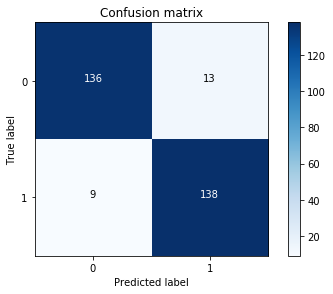

In [39]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_u,y_train_u.values.ravel())
y_pred_undersample = lr.predict(X_test_u.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_u,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Oversampling Srategy

#### recall

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

feature=credit_cards[features_columns]
label=credit_cards['Class']

f_train,f_test,l_train,l_test = train_test_split(feature,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=0)                                                                            

In [42]:
# only train data need oversampling
oversampler = SMOTE(random_state = 0)
os_f,os_l = oversampler.fit_sample(f_train,l_train)

In [43]:
printing_Kfold_scores(os_f,os_l)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

iteration: 1  recall score= 0.8903225806451613
iteration: 2  recall score= 0.8947368421052632
iteration: 3  recall score= 0.9688834790306518
iteration: 4  recall score= 0.9577714028203691
iteration: 5  recall score= 0.9584198898671151


mean recall score= 0.9340268388937121
-------------------------------------------
C parameter:  0.1
-------------------------------------------

iteration: 1  recall score= 0.8903225806451613
iteration: 2  recall score= 0.8947368421052632
iteration: 3  recall score= 0.9701006971340046
iteration: 4  recall score= 0.9596289335135908
iteration: 5  recall score= 0.9605741858190172


mean recall score= 0.9350726478434074
-------------------------------------------
C parameter:  1
-------------------------------------------

iteration: 1  recall score= 0.8903225806451613
iteration: 2  recall score= 0.8947368421052632
iteration: 3  recall score= 0.970410

100

#### confusion matrix

In [44]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_f,os_l.values.ravel())
y_pred = lr.predict(f_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(l_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'